# **CVPS20 // Linear Regression and Template fitting: Part 2**

*October 1, 2020*

In this notebook, we explore several different ways of performing linear regression on 1D and 2D data.

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio

In [ ]:
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gist_gray"

### Regression the Normal Equation

#### **Linear Regression**

The Normal Equation

<big> $\vec{y} = {\bf P} \ \vec{a}$

$({\bf P}^T {\bf P})^{-1} \cdot {\bf P}^{T} \vec{y} = \vec{a}$ </big>

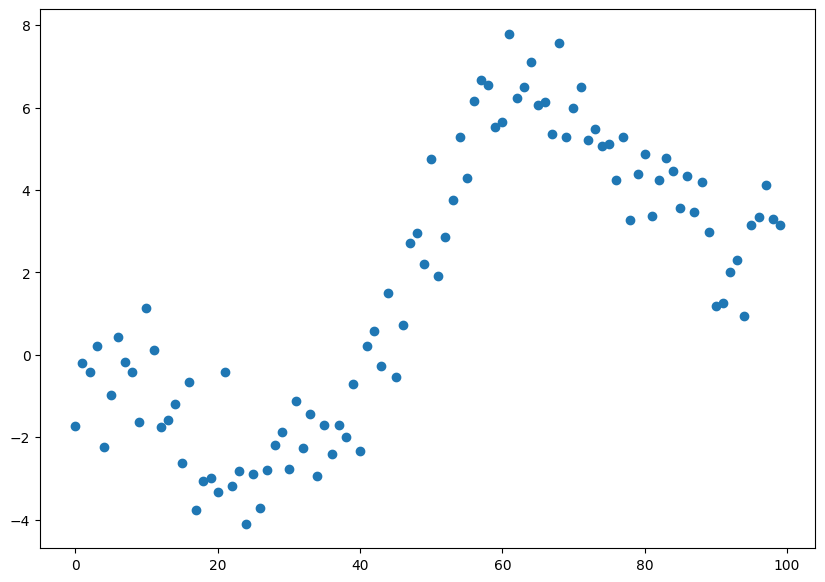

In [ ]:
# -- generate 3 1D data sets
xval = np.linspace(0, 10, 100, False)
x1 = np.exp(-xval**2 / (2.0 * 4.0**2))
x2 = np.cos(xval)
x3 = np.sqrt(xval / 20.)

# -- create a linear combination of those data sets
np.random.seed(712)
noise = np.random.randn(len(xval))

y = 1 + -5 * x1 + 3 * x2 + 7 * x3 + 1 * noise

fig, ax = plt.subplots()
ax.plot(y, 'o')
fig.show()

Now create the "template" matrix and fit,

avec = [ 0.26988975 -4.55026359  2.87472805  8.08907678]

MSE : 0.8217006818355571



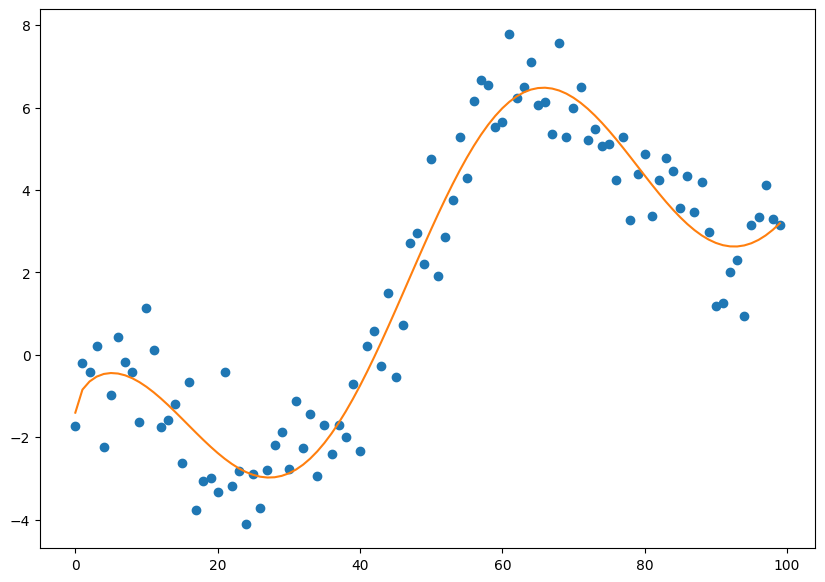

In [ ]:
# -- create template matrix and fit
P = np.array([np.ones_like(x1), x1, x2, x3]).T
PTy = np.dot(P.T, y)
PTP = np.dot(P.T, P)
PTPi = np.linalg.inv(PTP)
avec = np.dot(PTPi, PTy)

print("avec = {0}\n".format(avec))

# -- create the model
model = avec[0] + avec[1] * x1 + avec[2] * x2 + avec[3] * x3
mse = np.mean((y - model)**2)
print("MSE : {0}\n".format(mse))

# -- plot it
fig, ax = plt.subplots()
ax.plot(y, "o")
ax.plot(model)
fig.show()

---

### Correlation and Templates fitting with Images

#### **Example: Hand-written Digits (part 1)**

<ipython-input-6-c58d3a63b97b>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  digits = np.asarray(iio.imread(fname)) / 255.


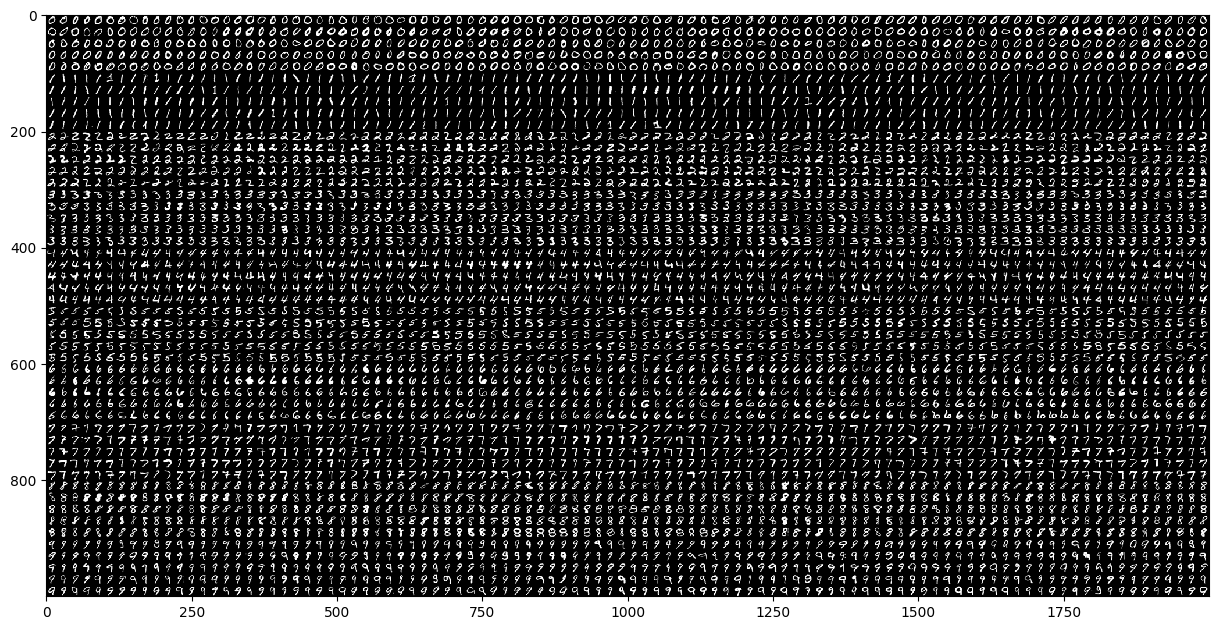

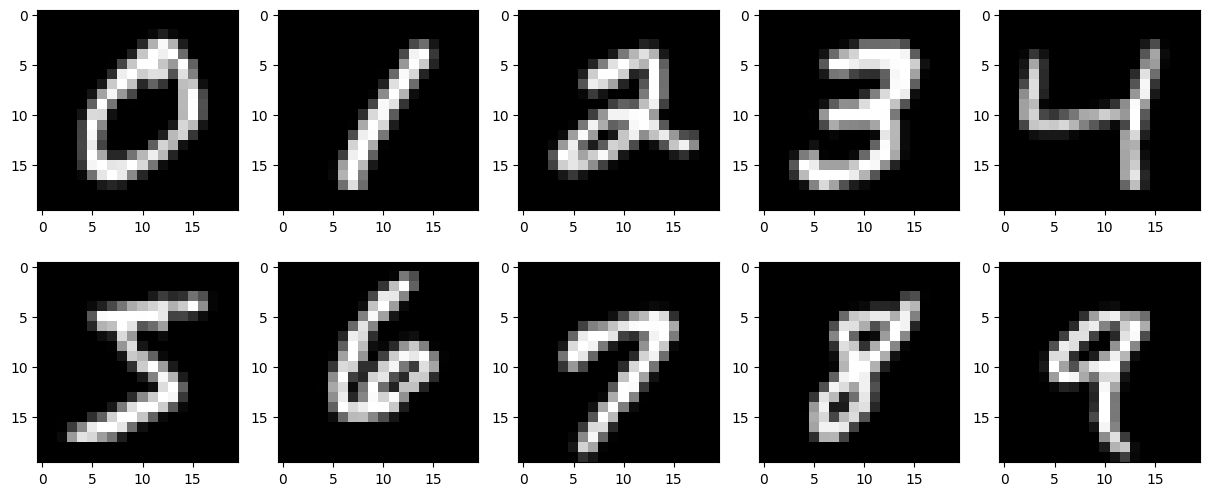

In [ ]:
# -- load in the hand-written digits data set
fname = "/content/drive/My Drive/cvps20/data/examples/digits.png"
digits = np.asarray(iio.imread(fname)) / 255.

# -- plot it
fig, ax = plt.subplots(figsize=(15, 8))
ax.imshow(digits)
fig.show()

# -- get a list of individual numbers (note they are 20x20 pixels)
nums = digits.reshape(50, 20, 100, 20).transpose(0, 2, 1, 3).reshape(5000, 20, 20)

# -- plot examples
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
for ii in range(10):
  ax[ii // 5, ii % 5].imshow(nums[ii * 500])
fig.show()

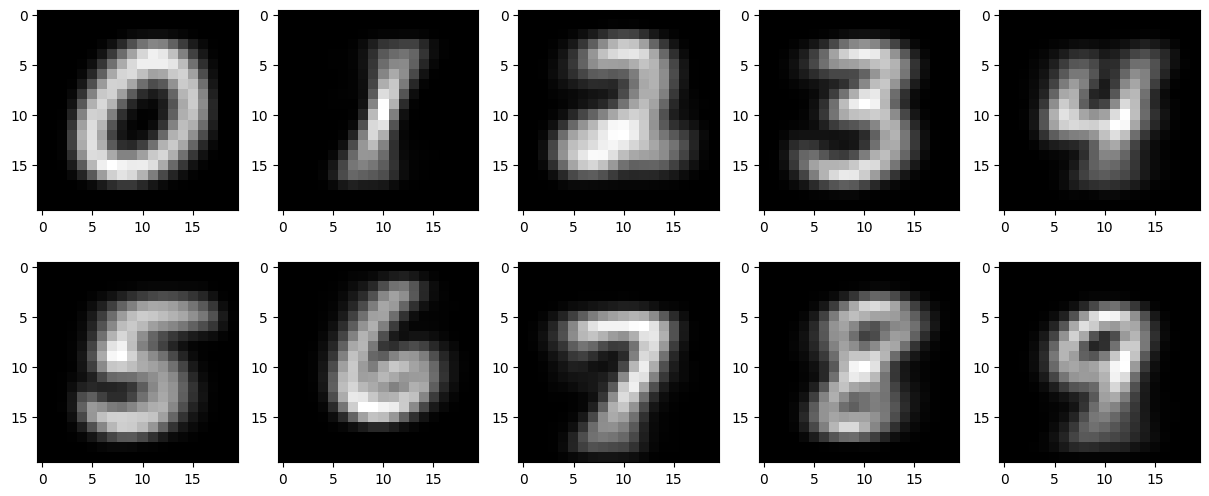

In [ ]:
# -- build templates by taking the mean across all examples
templs = np.zeros((10, 20, 20))

for ii in range(10):
  st = 500 * ii
  en = 500 * (ii + 1)
  templs[ii] = nums[st:en].mean(axis=0)

# -- plot templates
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
for ii in range(10):
  ax[ii // 5, ii % 5].imshow(templs[ii])
fig.show()

avec = [ 0.02018885  0.0814404  -0.08929835  0.6859863   0.46187872 -0.46307694
 -0.0997574  -0.25691733 -0.37439192  0.90001232]



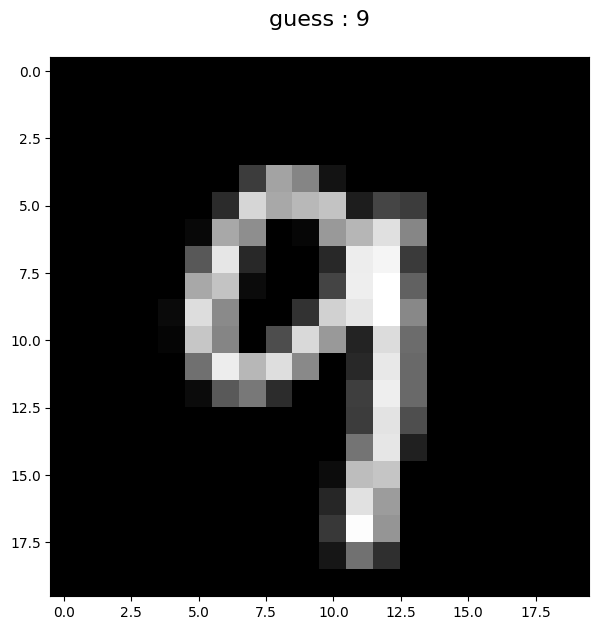

In [ ]:
# -- select random image index
np.random.seed(302)
ind = np.random.randint(0, nums.shape[0])
img = nums[ind]

# -- what is the guess?
P = templs.reshape(10, 400).T
PTy = np.dot(P.T, img.flatten())
PTP = np.dot(P.T, P)
PTPi = np.linalg.inv(PTP)
avec = np.dot(PTPi, PTy)

print("avec = {0}\n".format(avec))

# -- the guess is the index of the maximum avec
guess = avec.argmax()

# -- show it
fig, ax = plt.subplots()
ax.imshow(img)
ax.set_title("guess : {0}\n".format(guess), fontsize=16)
fig.show()

*Note: this is only the **most basic** technique of recognizing handwritten characters. There are much more effective ways to solve this problem that we'll cover in a couple of weeks, but it is a good illustration of regressions and correlations...*

---

### Regression with Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
# -- initialize the model
model = SGDRegressor(fit_intercept=False,
                     verbose=2
                     )

In [ ]:
# -- fit to the data
model.fit(P, img.flatten())

-- Epoch 1
Norm: 0.11, NNZs: 10, Bias: 0.000000, T: 400, Avg. loss: 0.030223
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.16, NNZs: 10, Bias: 0.000000, T: 800, Avg. loss: 0.024668
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.19, NNZs: 10, Bias: 0.000000, T: 1200, Avg. loss: 0.022599
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.21, NNZs: 10, Bias: 0.000000, T: 1600, Avg. loss: 0.021583
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.22, NNZs: 10, Bias: 0.000000, T: 2000, Avg. loss: 0.021014
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.24, NNZs: 10, Bias: 0.000000, T: 2400, Avg. loss: 0.020668
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.25, NNZs: 10, Bias: 0.000000, T: 2800, Avg. loss: 0.020426
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.25, NNZs: 10, Bias: 0.000000, T: 3200, Avg. loss: 0.020250
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.26, NNZs: 10, Bias: 0.000000, T: 3600, Avg. loss: 0.020113
Total training time:

SGDRegressor(fit_intercept=False, verbose=2)

In [ ]:
# -- print the coefficients
print("coefficients : {0}\n".format(model.coef_))
print("guess : {0}".format(model.coef_.argmax()))

coefficients : [0.05178223 0.04261085 0.06398696 0.09781049 0.11264946 0.06129875
 0.05814039 0.09142818 0.07821867 0.12126618]

guess : 9


In [43]:
dir(model)

['C',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_allocate_parameter_mem',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_fit',
 '_fit_regressor',
 '_get_default_requests',
 '_get_doc_link',
 '_get_learning_rate_type',
 '_get_loss_function',
 '_get_metadata_request',
 '_get_param_names',
 '_get_penalty_type',
 '_get_tags',
 '_make_validation_score_cb',
 '_make_validation_split',
 '_more_tags',
 '_